   SquareFootage  Bedrooms  Bathrooms         Price
0           3974         3          4  1.089027e+06
1           1660         3          1  4.909986e+05
2           2094         1          4  6.125336e+05
3           1930         5          4  5.623226e+05
4           1895         1          4  4.997635e+05


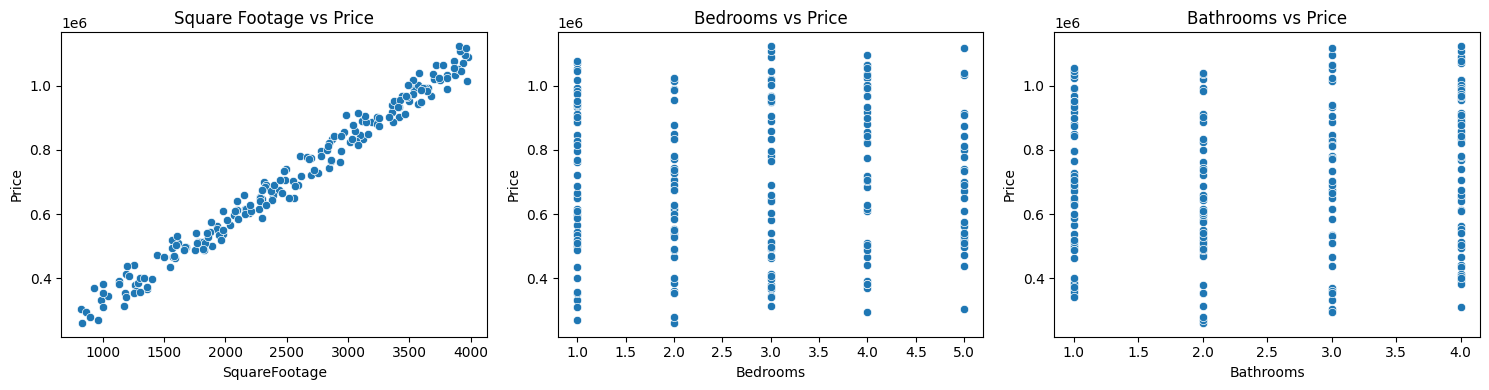

R² Score (Accuracy): 0.9875
Mean Squared Error: 741359953.42


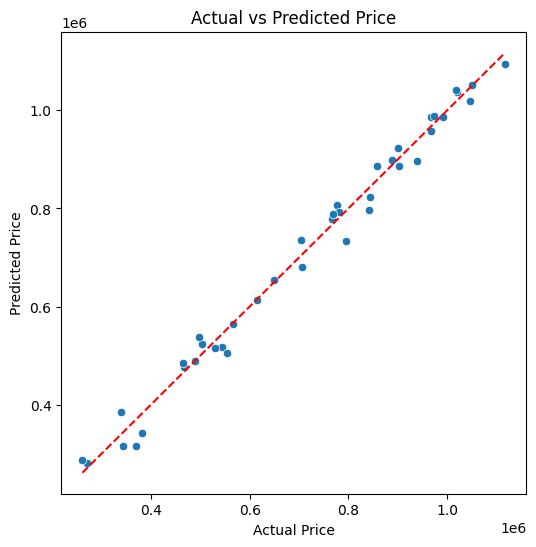

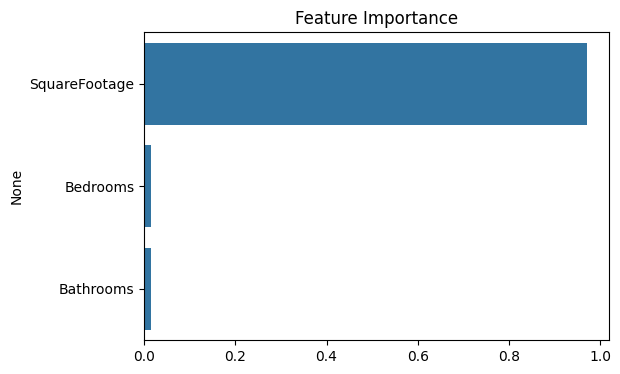

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create synthetic dataset
np.random.seed(42)
n = 200

square_footage = np.random.randint(800, 4000, n)
bedrooms = np.random.randint(1, 6, n)
bathrooms = np.random.randint(1, 5, n)

# Generate prices with some realistic noise
price = (square_footage * np.random.uniform(200, 300) +
         bedrooms * np.random.uniform(10000, 20000) +
         bathrooms * np.random.uniform(8000, 15000) +
         np.random.normal(0, 20000, n))

df = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': price
})

print(df.head())

# 2. Visualize features vs price
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='SquareFootage', y='Price', data=df)
plt.title("Square Footage vs Price")

plt.subplot(1, 3, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=df)
plt.title("Bedrooms vs Price")

plt.subplot(1, 3, 3)
sns.scatterplot(x='Bathrooms', y='Price', data=df)
plt.title("Bathrooms vs Price")

plt.tight_layout()
plt.show()

# 3. Train-test split
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Model training
model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# 7. Predicted vs Actual plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# 8. Feature importance plot
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()
